## 환경이 청소년 범죄 발생에 미치는 영향 분석

### 가설
#### 청소년이 유해업소 등 직접적인 유해환경에 노출된 경우 충동적으로 범죄를 일으킬수 있지 않을까?

In [1]:
# 판다스 및 matplotlib 라이브러리 선언
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib


# 한글 폰트 설정
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)


# csv (crime_teenager) 파일 읽기
crime_teenager = pd.read_csv('crime_teenager.csv', encoding='euc-kr')

print(crime_teenager)


   location  murder  robbery  forcible_rape  thief  violence
0      중  부       0        0              1     44        42
1      종  로       0        3              4     34        57
2       남대문       0        0              0     43         4
3       서대문       0        4              5    142       103
4      혜  화       0        2              2     38        29
5      용  산       0        4              4     56        70
6      성  북       0        1              5     69        99
7       동대문       1        1              5    126        76
8      마  포       0        0             13    156       164
9       영등포       0        0              6    119       118
10     성  동       0        0             11    105        73
11     동  작       1        3              6    107        65
12     광  진       0        0             29    155       153
13     서  부       0        0              4    120       131
14     강  북       0        0              9    166       210
15     금  천       0     

* 서울특별시 지역(구)별 청소년 유해 업소 수

In [2]:
# seaborn 라이브러리 선언
import seaborn as sns

### 파일 불러오기

In [3]:
nightlife_crime2 = pd.read_csv('nightlife_crime 2.csv', encoding='euc-kr')

print(nightlife_crime2)

   region  pub  karaoke  tot_nightlife  murder  robbery  forcible_rape  thef  \
0      강남  283      354            637       0        6             19   140   
1      강동  146      106            252       0        3              6   193   
2      강북   79      128            207       0        0              9   166   
3      강서  113      167            280       0        3              9   273   
4      관악  223       99            322       0        2             14   170   
5      광진   19       91            110       0        0             29   155   
6      구로   38      110            148       0        1              3   157   
7      금천   60       82            142       0        0              7   146   
8      노원   30       57             87       0        6             14   227   
9      도봉   21       55             76       0        6             21   126   
10    동대문   88      115            203       1        1              5   126   
11     동작   55       55            110  

In [4]:
# 구별 청소년 유해 업소 수 
teenager_no2 = nightlife_crime2[["region","tot_nightlife","murder","robbery","forcible_rape","thef","violence"]]
print(teenager_no2)

# teenager_no2.plot.bar(x="region",y="tot_nightlife")

   region  tot_nightlife  murder  robbery  forcible_rape  thef  violence
0      강남            637       0        6             19   140       176
1      강동            252       0        3              6   193       158
2      강북            207       0        0              9   166       210
3      강서            280       0        3              9   273       240
4      관악            322       0        2             14   170       209
5      광진            110       0        0             29   155       153
6      구로            148       0        1              3   157       194
7      금천            142       0        0              7   146        66
8      노원             87       0        6             14   227       337
9      도봉             76       0        6             21   126       107
10    동대문            203       1        1              5   126        76
11     동작            110       1        3              6   107        65
12     마포            175       0        0          

### 구별 유흥 업소 수와 범죄 수 시각화 (막대 그래프)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


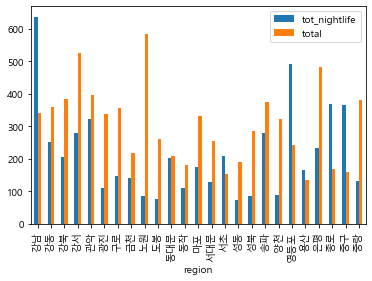

In [5]:

# print(nightlife_crime)

teenager_no2['total'] = nightlife_crime2[['murder','robbery','forcible_rape','thef','violence']].sum(axis=1)

# print(teenager_no)

teenager_no2.plot.bar(x="region",y=["tot_nightlife","total"])

### 변수간 상관관계 시각화

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


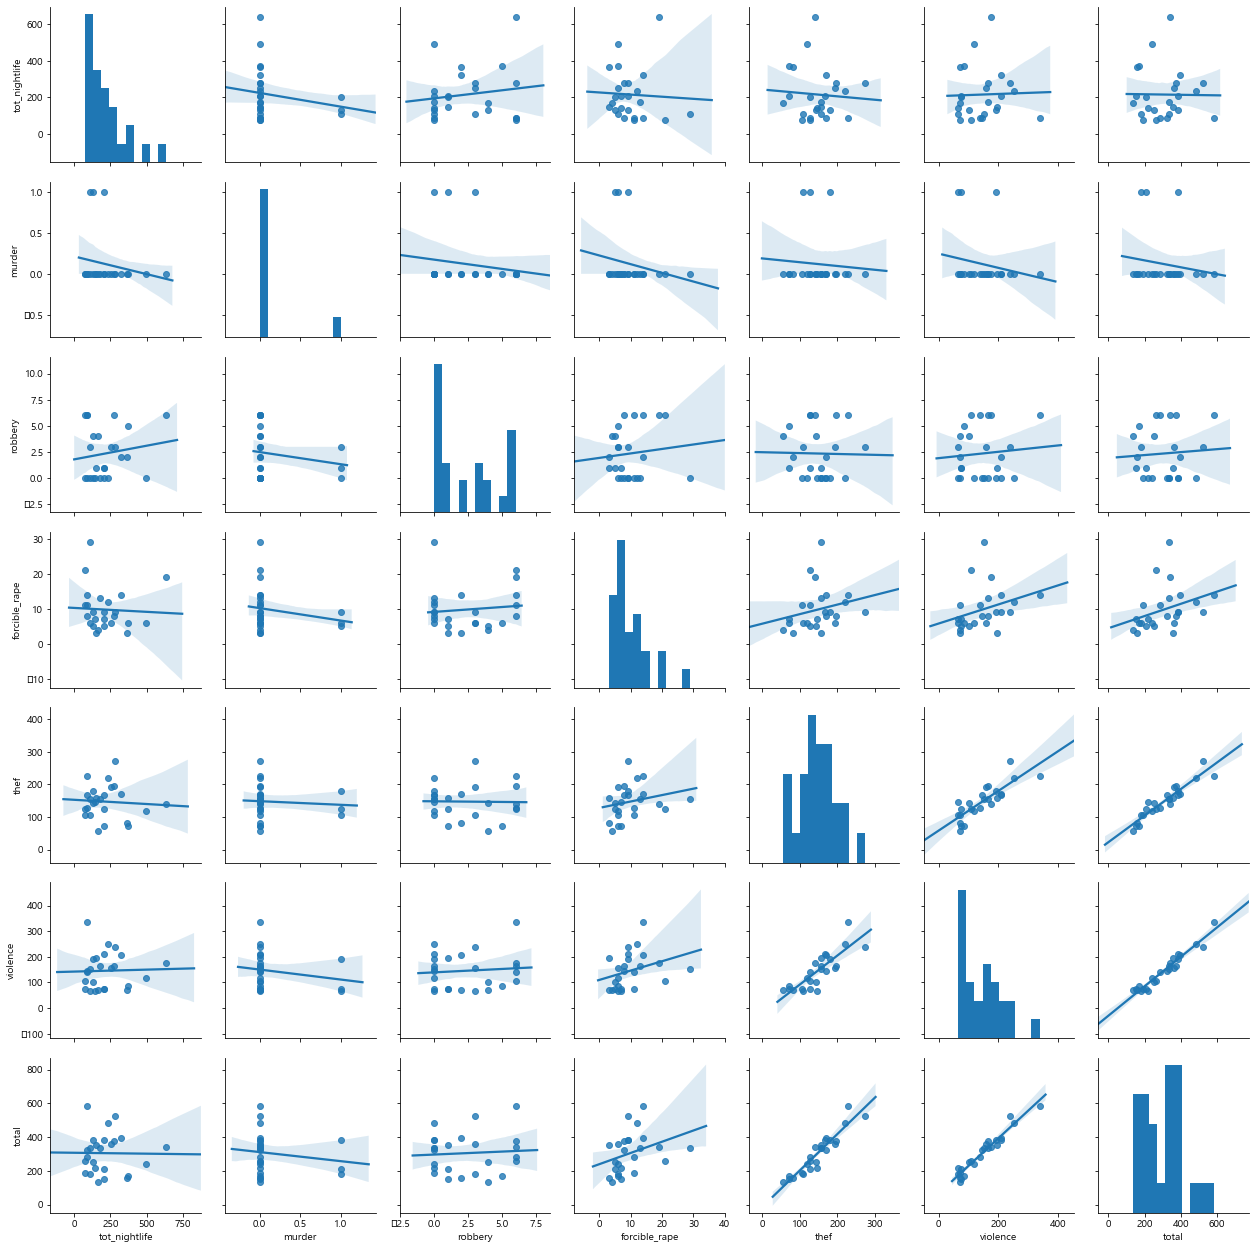

In [6]:
sns.pairplot(teenager_no2, kind="reg")
plt.show()

### HeatMap 시각화

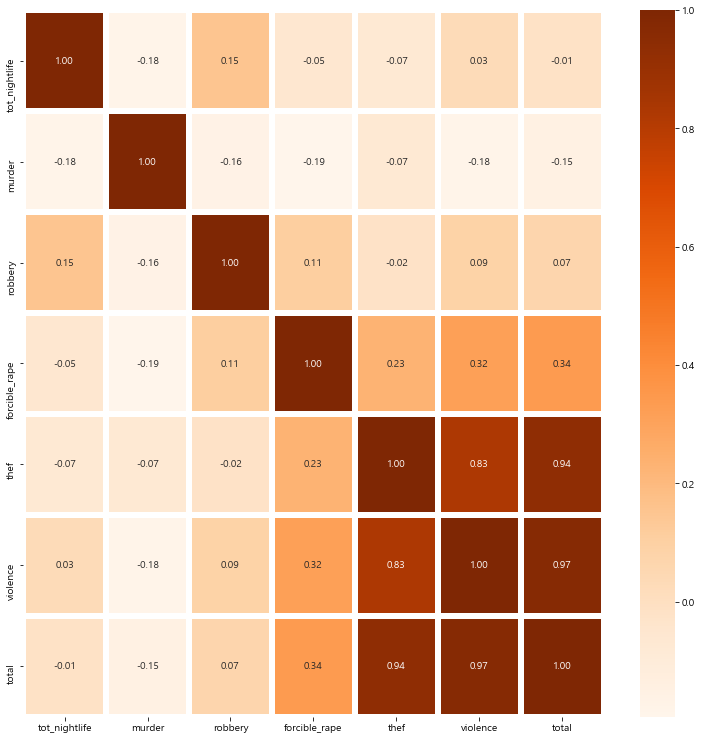

In [7]:
#HeatMap
%matplotlib inline
plt.figure(figsize=(13,13))
sns.heatmap(data = teenager_no2.corr(), annot=True,
fmt = '.2f',linewidth=5,cmap='Oranges')

시각화 결론

유흥업소 수, 범죄 발생 수 ,전체 발생 수 가 약한 상관관계
유흥업소 수가 청소년 범죄에 영향 미미